In [1]:
# 1. Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc


In [2]:
# 2. Carregar o dataset salvo
df = pd.read_csv("dataset.csv")
print(df.shape)

# Separar variáveis explicativas e alvo
X = df[df.columns[:-1]]
y = df[df.columns[-1:]]

(1000, 11)


In [3]:
# 3. Dividir em treino e teste
# Use stratify=y para manter o desbalanceamento nas duas partes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [4]:
# 4. Treinar modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniconda/base/envs/alpha-py310/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [5]:
# # 5. Gerar previsões com threshold 0.5
y_proba = modelo.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

In [6]:
# 6. Construir matriz de confusão
# A partir da matriz, os alunos devem calcular manualmente: acurácia, precisão, recall e F1-score
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(matriz)

Matriz de Confusão:
[[176   1]
 [ 18   5]]


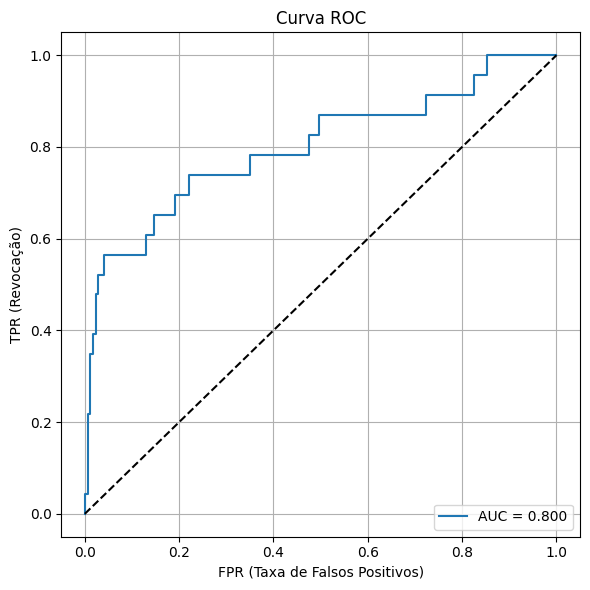

In [7]:
# # 7. Plotar curva ROC e calcular AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Revocação)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

0.24242424242424243
[[170   7]
 [ 10  13]]
0.65
0.5652173913043478
0.6046511627906976


/var/folders/p5/0wjpw3594x53gr6w8yv_trj40000gq/T/ipykernel_57940/3077772525.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return tp/(tp+fp)


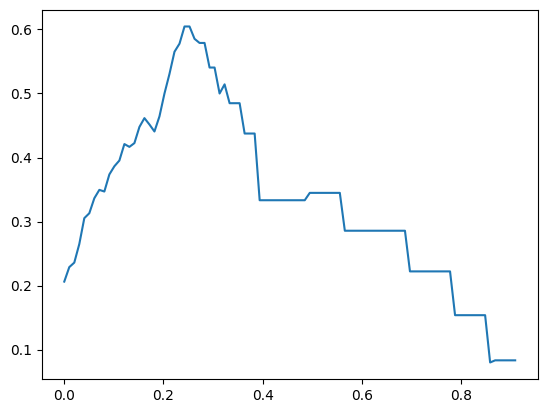

In [8]:
def get_confusion_matrix(threshold):
    y_proba = modelo.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    return confusion_matrix(y_test, y_pred)

def get_precision(matrix):
    tn, fp, fn, tp = matrix.ravel()
    return tp/(tp+fp)

def get_recall(matrix):
    tn, fp, fn, tp = matrix.ravel()
    return tp/(tp+fn)

def get_f1(matrix):
    precision = get_precision(matrix)
    recall = get_recall(matrix)
    return 2*(precision*recall)/(precision+recall)

# 9. Desafio: encontrar o melhor threshold com base no F1-score

# a) Crie uma lista de thresholds entre 0 e 1 (ex: np.linspace(0, 1, 100))
thresholds = np.linspace(0, 1, 100)

# b) Para cada threshold, calcule as previsões binárias e a matriz de confusão
matrix_list = [get_confusion_matrix(threshold) for threshold in thresholds]

# c) A partir da matriz, calcule manualmente:
precisão = [get_precision(i) for i in matrix_list]
recall   = [get_recall(i) for i in matrix_list]
f1       = [get_f1(i) for i in matrix_list]

# d) Guarde o F1-score para cada threshold

# e) Plote o gráfico do F1-score em função do threshold
#    Isso ajuda a visualizar qual valor produz o melhor equilíbrio entre precisão e recall
plt.plot(thresholds, f1)

# f) Escolha o melhor threshold e refaça a matriz de confusão final
t = thresholds[f1.index(max(f1))]
print(t)
print(get_confusion_matrix(t))
print(get_precision(get_confusion_matrix(t)))
print(get_recall(get_confusion_matrix(t)))
print(get_f1(get_confusion_matrix(t)))